# Graphing $f(Q^2) = x$

## Electron Scattering

### Formula

$$Q^2 = 2 \cdot E \cdot E_p \cdot (1 + \cos{\theta})$$

$$y = 1 - \frac{E_p}{2E} (1 - \cos{\theta})$$

$$Q^2 = sxy$$

$s$ is a constant. $y$ $\theta$ are the variables we need to remove.

$$x = \frac{Q^{2}4E^2}{s(Q^2 - 2EE_p + 4E^2)}$$

### Collecting Points

In [11]:
import numpy as np
import uproot as ur
import awkward as ak
import matplotlib.pyplot as plt
from math import log, cos, atan, degrees,e

# every line we graph
graphs = []

# x range
rang = np.logspace(0, 4, 1000)


# constants
s = 4 * 18 * 275
E = 18
P = 27

# loop through electron energies
for Eprime in (i*2 for i in range(100)):
    x = []
    Q2 = np.logspace(0, 4, 1000)
    for q in rang:
        xvar = (4 * q * E**2) / (s * (q - 2*E*Eprime + 4*E**2))
        y = q / (xvar * s)
        # make sure x is within range
        if y > 1 or  xvar > 1 or  xvar < 0:
            Q2 = Q2[Q2 != q]
        else:
            x.append(xvar)
    if len(x) > 0:
        x.pop()
        Q2 = Q2[:-1]
        graphs.append([x, Q2])

angles = []

# loop through electron energies
for n in  [-2,0]:
    x = []
    Q2 = np.logspace(0, 4, 1000)
    for q in rang:
        theta = atan(e**-n) * 2
        xvar = -q*((1 + cos(theta)) * 4*E**2) / (q*(1 - cos(theta)) - 4*E**2 * (1 + cos(theta)))/s
        y = q / (xvar * s)
        # make sure x is within range
        if y > 1 or  xvar > 1 or  xvar < 0:
            Q2 = Q2[Q2 != q]
        else:
            x.append(xvar)
    if len(x) > 0:
        x.pop()
        Q2 = Q2[:-1]
        x.append(1)
        Q2 = np.append(Q2, [Q2[-1]])
        angles.append([x, Q2])


# test for y
ylines = []

for y in [1, 0.1, 0.01]:
    x = []
    Q2 = np.logspace(0, 4, 1000)
    for q in rang:
        xvar = q / (y * s)
        y = q / (xvar * s)
        # make sure x is within range
        if xvar > 1 or  xvar < 0:
            Q2 = Q2[Q2 != q]
        else:
            x.append(xvar)
    if len(x) > 0:
        x.pop()
        Q2 = Q2[:-1]
        ylines.append([x, Q2])



### Graphing $x$ vs. $Q^2$

99


Text(0.1, 4.466835921509632, '$\\eta = -2$')

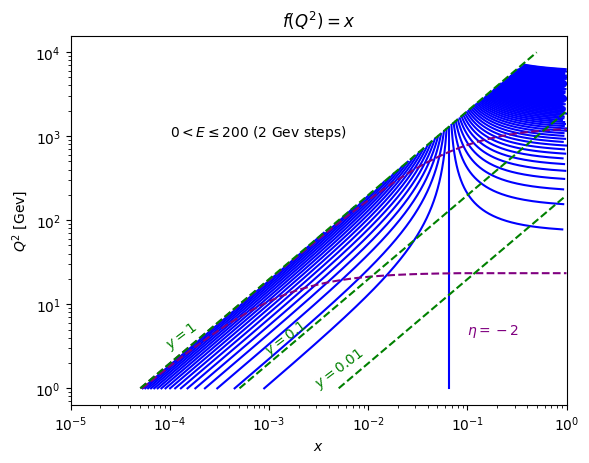

In [14]:

print(len(graphs))
plt.title('$f(Q^2) = x$')

plt.xscale('log')
plt.yscale('log')

plt.ylabel('$Q^2$ [Gev]')
plt.xlabel('$x$')
plt.xlim((10**-5 , 1))

for g in graphs:
    x, Q2 = g
    plt.plot(x, Q2, color = 'blue')

for g in angles:
    x, Q2 = g
    plt.plot(x, Q2, color = 'purple', ls = '--')


for g in ylines:
    x, Q2 = g
    plt.plot(x, Q2, color = 'green', ls = '--')

plt.text(10**-4,10**3, '$0<E\leq200$ (2 Gev steps)')

# find the slop of y line and rotate based on that

angle = 37
plt.text(10**-4, 10**.47, '$y = 1$',
         color='green',
         rotation=angle, rotation_mode='anchor', )

plt.text(10**-3, 10**.39, '$y = 0.1$',
         color='green',
         rotation=angle, rotation_mode='anchor', )

plt.text(10**-2.5, 1, '$y = 0.01$',
         color='green',
         rotation=angle, rotation_mode='anchor', )

plt.text(10**-1, 10**.65, '$\eta = -2$',
         color='purple' )


## Jacquet–Blondel 

### Formula

Using these known formulas.

$$y = \frac{1}{2E_e}\Sigma_h(E_h - p_{zh})$$

$$Q^2 = \frac{1}{1-y_{JB}}((\Sigma_h p_{xh})^2 + (\Sigma_h p_{yh})^2)$$

$${p_x}{p_y} = (\Sigma_h p_{xh})^2 + (\Sigma_h p_{yh})^2$$

$$Ep_z = \Sigma_h(E_h - p_{zh})$$

In terms of $f(Q^2)$

$$x = \frac{2Q^2E_e}{sEp_z}$$

$$x = -\frac{(Q^2)^2}{s({p_x}{p_y} - Q^2)}$$

### Collecting Points

In [13]:
import numpy as np
import uproot as ur
import awkward as ak
import matplotlib.pyplot as plt
from math import log, cos, atan, degrees,e

# every line we graph
ptGraph = []

# x range
rang = np.logspace(0, 4, 1000)


# constants
s = 4 * 18 * 275
E = 18


# loop through pt
for p in range(1, 300, 10):
    x = []
    Q2 = np.logspace(0, 4, 1000)
    for q in rang:
        xvar = -q**2 / (s * (p - q))
        y = q / (xvar * s)
        # make sure x is within range
        if y > 1 or  xvar > 1 or  xvar < 0:
            Q2 = Q2[Q2 != q]
        else:
            x.append(xvar)
    if len(x) > 0:
        x.pop()
        Q2 = Q2[:-1]
        ptGraph.append([x, Q2])

epzGraphs = []

# loop through 
for epz in [0.01, 0.1, 1, 10, 36]:
    x = []
    Q2 = np.logspace(0, 4, 1000)
    for q in rang:
        xvar = (2 * q * E) / (s * epz)
        y = q / (xvar * s)
        # make sure x is within range
        if y > 1 or  xvar > 1 or  xvar < 0:
            Q2 = Q2[Q2 != q]
        else:
            x.append(xvar)
    if len(x) > 0:
        x.pop()
        Q2 = Q2[:-1]
        epzGraphs.append([x, Q2])

# graph y values
ylines = []

for y in [1, 0.1, 0.01]:
    x = []
    Q2 = np.logspace(0, 4, 1000)
    for q in rang:
        xvar = q / (y * s)
        y = q / (xvar * s)
        # make sure x is within range
        if xvar > 1 or  xvar < 0:
            Q2 = Q2[Q2 != q]
        else:
            x.append(xvar)
    if len(x) > 0:
        x.pop()
        Q2 = Q2[:-1]
        ylines.append([x, Q2])

C:\Users\eholt\AppData\Local\Temp\ipykernel_15216\3692174425.py:24: RuntimeWarning: divide by zero encountered in scalar divide
  xvar = -q**2 / (s * (p - q))


### Graphing $x$ vs. $Q^2$

Text(0.0031622776601683794, 1, '$y = 0.01$')

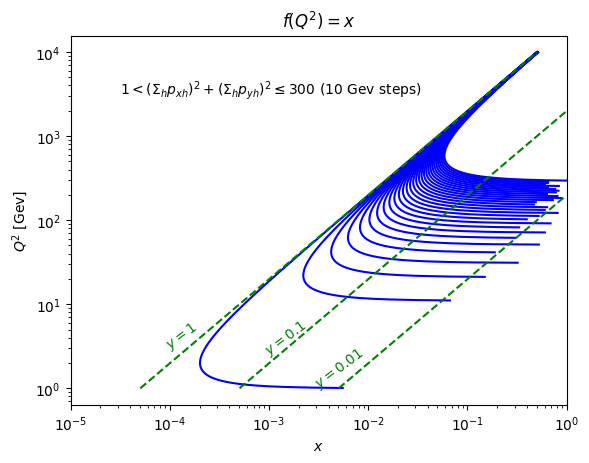

In [4]:

plt.title('$f(Q^2) = x$')

plt.xscale('log')
plt.yscale('log')

plt.ylabel('$Q^2$ [Gev]')
plt.xlabel('$x$')
plt.xlim((10**-5 , 1))

for g in ptGraph:
    x, Q2 = g
    plt.plot(x, Q2, color = 'blue')



for g in ylines:
    x, Q2 = g
    plt.plot(x, Q2, color = 'green', ls = '--')

#plt.text(10**-4,10**3, '$0<E\leq200$ (2 Gev steps)')

# find the slop of y line and rotate based on that

angle = 37

plt.text(10**-4.5,10**3.5, '$1<(\Sigma_h p_{xh})^2 + (\Sigma_h p_{yh})^2\leq300$ (10 Gev steps)')

# find the slop of y line and rotate based on that

angle = 37
plt.text(10**-4, 10**.47, '$y = 1$',
         color='green',
         rotation=angle, rotation_mode='anchor', )

plt.text(10**-3, 10**.39, '$y = 0.1$',
         color='green',
         rotation=angle, rotation_mode='anchor', )

plt.text(10**-2.5, 1, '$y = 0.01$',
         color='green',
         rotation=angle, rotation_mode='anchor', )


Text(0.15848931924611134, 1.2589254117941673, '$Ep_z = 0.01$')

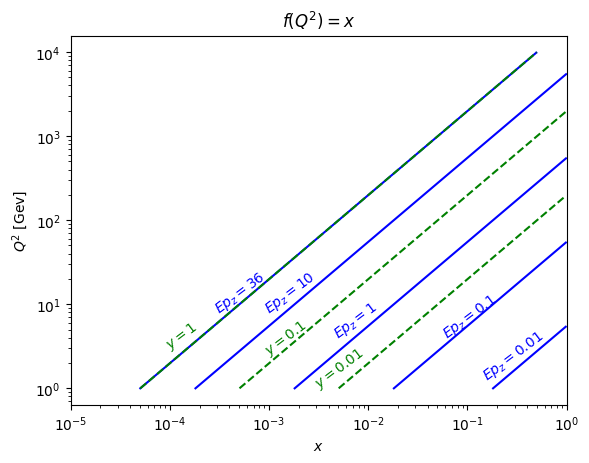

In [50]:
plt.title('$f(Q^2) = x$')

plt.xscale('log')
plt.yscale('log')

plt.ylabel('$Q^2$ [Gev]')
plt.xlabel('$x$')
plt.xlim((10**-5 , 1))

for g in epzGraphs:
    x, Q2 = g
    plt.plot(x, Q2, color = 'blue')



for g in ylines:
    x, Q2 = g
    plt.plot(x, Q2, color = 'green', ls = '--')

#plt.text(10**-4,10**3, '$0<E\leq200$ (2 Gev steps)')

# find the slop of y line and rotate based on that

angle = 37



angle = 37
# y lines label
plt.text(10**-4, 10**.47, '$y = 1$',
         color='green',
         rotation=angle, rotation_mode='anchor', )

plt.text(10**-3, 10**.39, '$y = 0.1$',
         color='green',
         rotation=angle, rotation_mode='anchor', )

plt.text(10**-2.5, 1, '$y = 0.01$',
         color='green',
         rotation=angle, rotation_mode='anchor', )

# epz label

plt.text(10**-3.5, 10**.9, '$Ep_z = 36$',
         color='blue',
         rotation=angle, rotation_mode='anchor', )

plt.text(10**-3, 10**.9, '$Ep_z = 10$',
         color='blue',
         rotation=angle, rotation_mode='anchor', )

plt.text(10**-2.3, 10**.6, '$Ep_z = 1$',
         color='blue',
         rotation=angle, rotation_mode='anchor', ) 

plt.text(10**-1.2, 10**.6, '$Ep_z = 0.1$',
         color='blue',
         rotation=angle, rotation_mode='anchor', ) 


plt.text(10**-.8, 10**.1, '$Ep_z = 0.01$',
         color='blue',
         rotation=angle, rotation_mode='anchor', ) 

In [9]:
# every line we graph
graphs = []

# x range
rang = np.logspace(0, 4, 1000)


# constants
s = 4 * 5 * 41
E = 18
P = 27

# loop through electron energies
for Eprime in (i*2 for i in range(100)):
    x = []
    Q2 = np.logspace(0, 4, 1000)
    for q in rang:
        xvar = (4 * q * E**2) / (s * (q - 2*E*Eprime + 4*E**2))
        y = q / (xvar * s)
        # make sure x is within range
        if y > 1 or  xvar > 1 or  xvar < 0:
            Q2 = Q2[Q2 != q]
        else:
            x.append(xvar)
    if len(x) > 0:
        x.pop()
        Q2 = Q2[:-1]
        graphs.append([x, Q2])

angles = []

# loop through electron energies
for n in  [-2,0]:
    x = []
    Q2 = np.logspace(0, 4, 1000)
    for q in rang:
        theta = atan(e**-n) * 2
        xvar = -q*((1 + cos(theta)) * 4*E**2) / (q*(1 - cos(theta)) - 4*E**2 * (1 + cos(theta)))/s
        y = q / (xvar * s)
        # make sure x is within range
        if y > 1 or  xvar > 1 or  xvar < 0:
            Q2 = Q2[Q2 != q]
        else:
            x.append(xvar)
    if len(x) > 0:
        x.pop()
        Q2 = Q2[:-1]
        x.append(1)
        Q2 = np.append(Q2, [Q2[-1]])
        angles.append([x, Q2])


# test for y
ylines = []

for y in [1, 0.1, 0.01]:
    x = []
    Q2 = np.logspace(0, 4, 1000)
    for q in rang:
        xvar = q / (y * s)
        y = q / (xvar * s)
        # make sure x is within range
        if xvar > 1 or  xvar < 0:
            Q2 = Q2[Q2 != q]
        else:
            x.append(xvar)
    if len(x) > 0:
        x.pop()
        Q2 = Q2[:-1]
        ylines.append([x, Q2])